COVID DATA ANALYSIS

shaili patel

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
confirm_data=pd.read_csv('/content/drive/My Drive/Data Science project/covid data analysis/covid19_Confirmed_dataset.csv')
death_data=pd.read_csv('/content/drive/My Drive/Data Science project/covid data analysis/covid19_deaths_dataset.csv')
happiness_report=pd.read_csv('/content/drive/My Drive/Data Science project/covid data analysis/worldwide_happiness_report.csv')

In [ ]:
print("we are given {} days of data for confirmed cases".format(len(confirm_data.columns[4:])))
print("we are given {} days of data for death cases".format(len(death_data.columns[4:])))

we are given 100 days of data for confirmed cases
we are given 100 days of data for death cases


In [ ]:
#check for null values
confirm_data.isnull().any()

In [ ]:
confirm_data[confirm_data['Province/State'].isnull()==True].head(3) #it means that for data cleaning we can remove Province/State feature.

In [ ]:
confirm_data.describe()

In [3]:
#the best thing to do right now is to group the data but first we will remove uneseccary features
confirm_data.drop(columns=['Province/State','Lat','Long'],axis=1,inplace=True)

In [5]:
#we cn now use groupby function to roup the data country or region wise
confirm_agg=confirm_data.groupby('Country/Region').sum()

In [ ]:
confirm_agg.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006


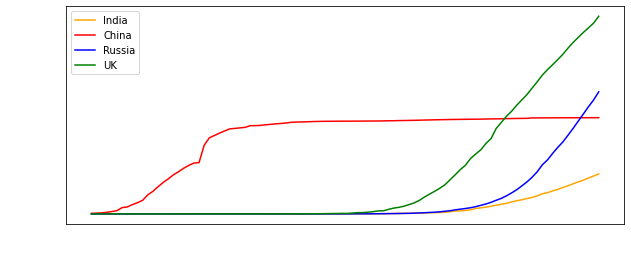

In [ ]:
#here we will plot the rise in cases of india with respect to china,russia and UK
plt.figure(figsize=(10,4))  #adjusting figure size
ax =confirm_agg.loc['India'].plot(color='orange',label='India')
confirm_agg.loc['China'].plot(color='red',label='China')
confirm_agg.loc['Russia'].plot(color='blue',label='Russia')
confirm_agg.loc['United Kingdom'].plot(color='green',label='UK')
ax.tick_params(axis='x', colors='white') #colour the axis to adjust the dark theme
ax.tick_params(axis='y', colors='white')
plt.xlabel('DATE',color='white')    #setting labels
plt.ylabel('No.Of Cases',color='white')
plt.legend()   
plt.show()

The above graph shows how cases started to rise from january onwards.
but it doesnot show the peak value to get the rate of promulgation of virus. For example cases in china were increaseing rapidly from january to march and then it became constant or might have decresed . so we need to find the date at which the cases where on the peak. 

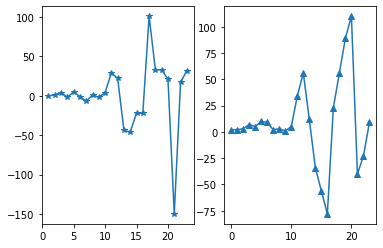

In [ ]:
#to find the rate of spread of virus we have to take the first derivative of the curve.s = pd.Series([2, 2, 3, 4, 5])
s = pd.Series([2, 2, 3, 7, 5,10,9,2,3,1,5,34,56,12,-34,-56,-78,23,56,89,110,-40,-23,9])
plt.subplot(121)
s.diff().plot(marker='*')
plt.subplot(122)
s.plot(marker='^')

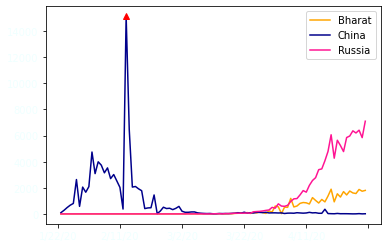

In [ ]:
confirm_agg.loc['India'].diff().plot(color='orange',label='Bharat')
confirm_agg.loc['China'].diff().plot(color='darkblue',label='China')
x=confirm_agg.loc['China'].diff().max()
plt.plot(22,x,'r^')
confirm_agg.loc['Russia'].diff().plot(color='deeppink',label='Russia')
plt.xticks(color='azure')
plt.yticks(color='azure')
plt.legend()
plt.show()

In [ ]:
df=pd.DataFrame(confirm_agg.loc['China']['2/11/20':'2/29/20'])

In [ ]:
df['diff']=df.diff()

In [ ]:
df.style.background_gradient(cmap='Dark2')

,China,diff
2/11/20,44386,nan
2/12/20,44759,373.000000
2/13/20,59895,15136.000000
2/14/20,66358,6463.000000
2/15/20,68413,2055.000000
2/16/20,70513,2100.000000
2/17/20,72434,1921.000000
2/18/20,74211,1777.000000
2/19/20,74619,408.000000
2/20/20,75077,458.000000


In [6]:
#let us find the maximum infection rate of all the countries
country=[i for i in confirm_agg.index]
maximum_rate=[]
for i in country:
    maximum_rate.append(confirm_agg.loc[i].diff().max())
confirm_agg['maximum_rate']=maximum_rate

In [ ]:
confirm_agg.head(3)

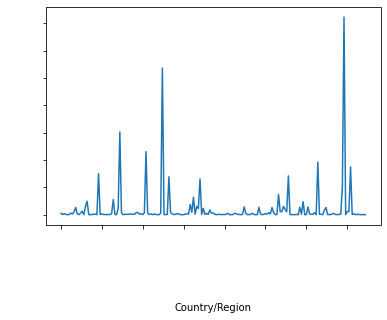

In [ ]:
confirm_agg['maximum_rate'].plot()
plt.xticks(rotation=90,color='white')
plt.yticks(color='white')
plt.show()

In [ ]:
confirm_agg['maximum_rate'].to_frame().sort_values(by=['maximum_rate'],ascending=False)[:10].style.background_gradient(cmap='Oranges')

,maximum_rate
Country/Region,
US,36188.000000
France,26849.000000
China,15136.000000
Ecuador,11536.000000
Spain,9630.000000
United Kingdom,8733.000000
Brazil,7502.000000
Russia,7099.000000
Germany,6933.000000


In [ ]:
confirm_agg['maximum_rate'].to_frame().sort_values(by=['maximum_rate'],ascending=False)[-10:].style.background_gradient(cmap='Greens')

,maximum_rate
Country/Region,
Western Sahara,4.000000
Suriname,3.000000
Namibia,3.000000
Laos,3.000000
Holy See,3.000000
Seychelles,2.000000
Mauritania,2.000000
Nicaragua,2.000000
Bhutan,1.000000


from the above curve we conclude that rate of spread of this virus is maximum in US followed by china and france and minimum in bhuta and east african countries like comoros and saychelles.

we don't have sufficient data to analzye like gender,age etc.
this was all about analysis of confirm cases.


In [ ]:
death_data.head(3)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450


In [ ]:
china_data=death_data[death_data['Country/Region']=='China']

In [7]:
death_data.drop(columns=['Province/State','Lat','Long'],axis=1,inplace=True)

In [8]:
death_agg=death_data.groupby('Country/Region').sum()

In [ ]:
death_agg.head(3)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,4,4,4,4,4,4,4,6,6,7,7,11,14,14,15,15,18,18,21,23,25,30,30,30,33,36,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,4,5,5,6,8,10,10,11,15,15,16,17,20,20,21,22,22,23,23,23,23,23,24,25,26,26,26,26,26,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,17,17,19,21,25,26,29,31,35,44,58,86,105,130,152,173,193,205,235,256,275,293,313,326,336,348,364,367,375,384,392,402,407,415,419,425,432,437,444,450


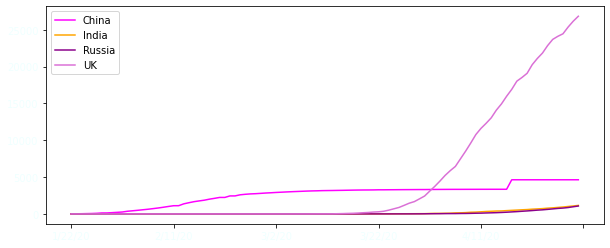

In [ ]:
# this plot is about the number of death of people  from china , india ,UK and Russia
plt.figure(figsize=(10,4))
death_agg.loc['China'].plot(color='magenta',label='China')
death_agg.loc['India'].plot(color='orange',label='India')
death_agg.loc['Russia'].plot(color='darkmagenta',label='Russia')
death_agg.loc['United Kingdom'].plot(color='orchid',label='UK')
plt.xticks(color='azure')
plt.yticks(color='azure')
plt.legend()
plt.show()

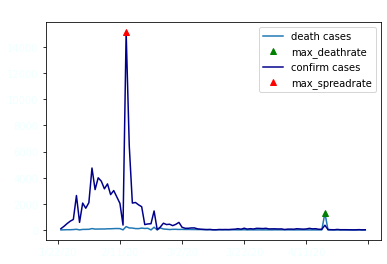

In [ ]:
#lets plot china's death rate
death_agg.loc['China'].diff().plot(label='death cases')
x=death_agg.loc['China'].diff().max()
plt.plot(86,x,'g^',label='max_deathrate')
confirm_agg.loc['China'].diff().plot(color='darkblue',label='confirm cases')
x=confirm_agg.loc['China'].diff().max()
plt.plot(22,x,'r^',label='max_spreadrate')
plt.xticks(color='azure')
plt.yticks(color='azure')
plt.title('CHINA',color='white')
plt.legend()
plt.show()
# observe that though china had maximum spread on 13th feb 2020, but the death rate was low.
#there was sudden rise in death rate after 11th april 2020 though the spread rate was low.

In [10]:
df=pd.DataFrame(confirm_agg.loc['China']['4/11/20':])

In [11]:
df['maximum_death_rate']=df.diff()

In [ ]:
df.style.background_gradient(cmap='rainbow')
#the maximum death happend on 17 th april.

,China,maximum_death_rate
4/11/20,83014,nan
4/12/20,83134,120.000000
4/13/20,83213,79.000000
4/14/20,83306,93.000000
4/15/20,83356,50.000000
4/16/20,83403,47.000000
4/17/20,83760,357.000000
4/18/20,83787,27.000000
4/19/20,83805,18.000000
4/20/20,83817,12.000000


In [12]:
#lets plot the maximum death rate of each country
country=[i for i in death_agg.index]
max_death_rate=[]
for i in country:
    max_death_rate.append(death_agg.loc[i].diff().max())
death_agg['max_dead']=max_death_rate

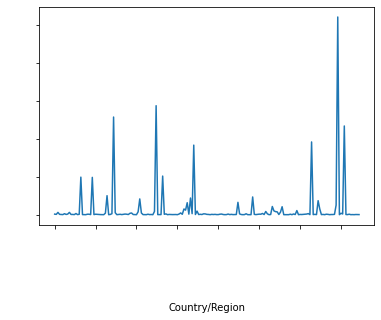

In [ ]:
death_agg['max_dead'].plot()
plt.xticks(rotation=90,color='white')
plt.yticks(color='white')
plt.show()

In [ ]:
death_agg['max_dead'].to_frame().sort_values(by=['max_dead'],ascending=False)[:10].style.background_gradient(cmap='Oranges')

,max_dead
Country/Region,
US,2612.000000
France,1440.000000
China,1290.000000
United Kingdom,1172.000000
Spain,961.000000
Italy,919.000000
Germany,510.000000
Belgium,496.000000
Brazil,493.000000


In [ ]:
death_agg['max_dead'].to_frame().sort_values(by=['max_dead'],ascending=False)[-30:-25].style.background_gradient(cmap='Greens')

,max_dead
Country/Region,
Mauritania,1.000000
Djibouti,1.000000
Uganda,0.000000
Grenada,0.000000
Eritrea,0.000000


we observed that US,CHINA and FRANCE had maximum number of death cases and infection rate.

In [ ]:
lat=[i for i in confirm_data['Lat']] #for confirmed cases
lon=[i for i in confirm_data['Long']] #for confirmed cases longitude

In [ ]:
import geopandas as gpd
from shapely.geometry import Point,Polygon

In [ ]:
geo=[Point(xy) for xy in  zip(lon,lat)]
g=gpd.GeoDataFrame(geometry=geo)

In [ ]:
 world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

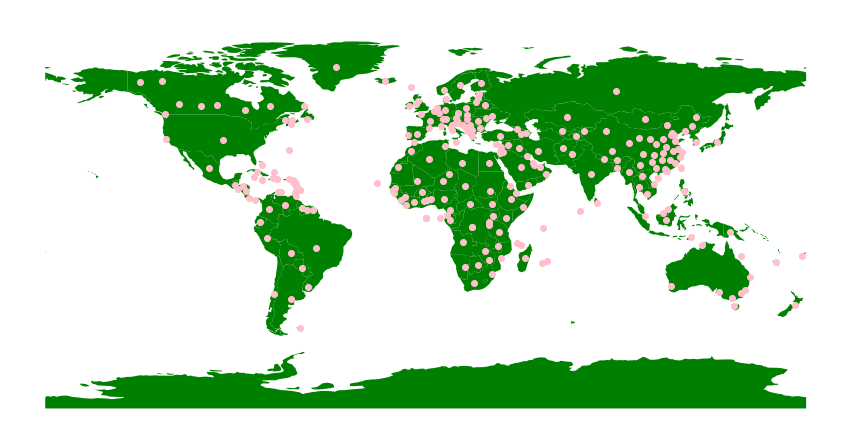

In [ ]:
fig,ax=plt.subplots(figsize=(15,10))
world.plot(ax=ax,color='green')
g.plot(ax=ax,color='pink')
plt.title('confirm cases in the world',color='white')
plt.axis('off')
plt.show()

In [13]:
corona_data=pd.DataFrame(confirm_agg["maximum_rate"])
death_data=pd.DataFrame(death_agg["max_dead"])

In [ ]:
happiness_report

(156, 9)

In [14]:
useless=['Overall rank','Score','Generosity','Perceptions of corruption']
happiness_report.drop(useless,axis=1,inplace=True)

In [15]:
#change the index to join other data
happiness_report.set_index("Country or region",inplace=True)

In [16]:
data=corona_data.join(happiness_report,how='inner')
data=death_data.join(data,how='inner')
data.head()

,max_dead,maximum_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,232.0,0.350,0.517,0.361,0.000
Albania,4.0,34.0,0.947,0.848,0.874,0.383
Algeria,30.0,199.0,1.002,1.160,0.785,0.086
Argentina,13.0,291.0,1.092,1.432,0.881,0.471
Armenia,3.0,134.0,0.850,1.055,0.815,0.283


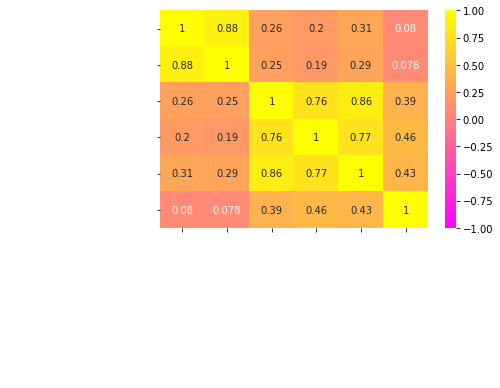

In [26]:
#let us find the correlation between the variables
sns.heatmap(data.corr(),cmap='spring',annot=True, vmin=-1, vmax=1, center= 0)
plt.xticks(color='White')
plt.yticks(color='white')
plt.show()

A correlation matrix can help us quickly understand the correlations between each pair of variables. 

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


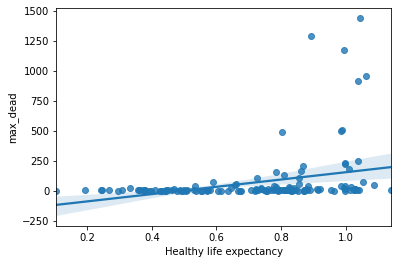

In [32]:
x=data['Healthy life expectancy']
y=data['max_dead']
sns.regplot(x,y)
plt.show()

That was it for now . we have health life expectancy which is health  measure that combines age-specific mortality with morbidity or health status to estimate expected years of life in good health for persons at a given age . If we look at the plot , we observe that there are few nations or countries which have high LE but the death rate is high as well. One possible reason could be the lack of covid data we have which is of only 3 months. In the beginning, due to lack of covid awareness the death rate and the confirmed cases might be increasing.

Data is very powerful. Combining different data can help us tell the story that matters and insights.

